## Esame Metodi Numerici  12 Giugno 2024 - Turno II Ore 12,30

## Esercizio 1
Si considerino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testII.mat**.


- Si implementino e si testino sui dati forniti almeno due metodi che sono adatti a risolvere sistemi lineari con le caratteristiche delle matrici dei coefficienti date in input.
                                      **punti 8**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **punti 3**


**Totale Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testII')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


A diagonalmente dominante =  False
A1 diagonalmente dominante =  False
A simmetrica =  True
A def pos =  True
A1 simmetrica =  True
A1 def pos =  True
raggio spettrale Gauss-Seidel  0.9399020442983465
raggio spettrale Gauss-Seidel SOR  0.9098713508282279
raggio spettrale Gauss-Seidel  0.9993658641407382
raggio spettrale Gauss-Seidel SOR  0.9988066111342278


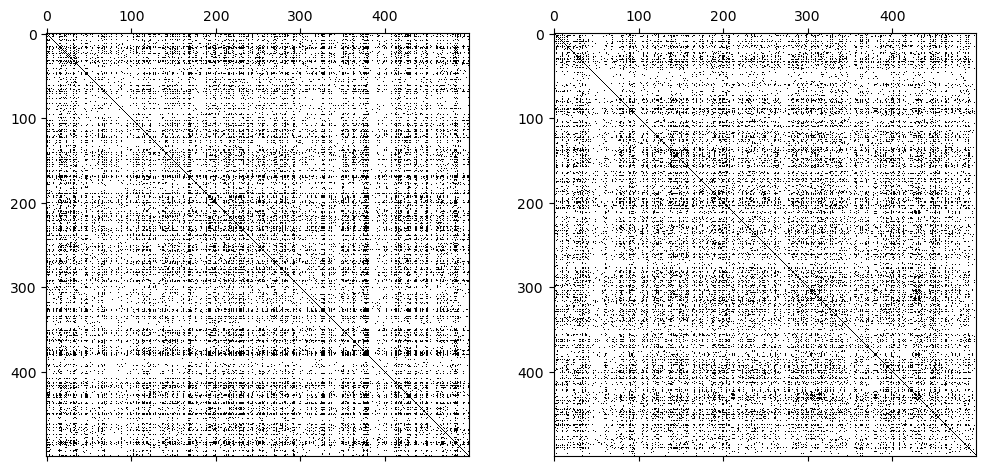

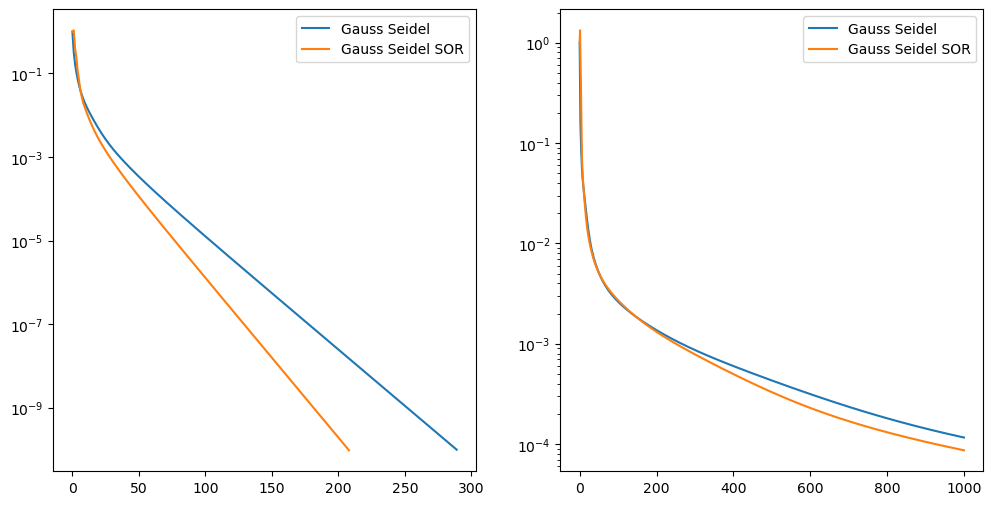

In [7]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import sympy as sym
import numpy.linalg as npl
import scipy.linalg as spl
import numpy as np
import sys, os
sys.path.append(os.path.abspath('../Scheletri'))

import Schel_FULL as sf


def is_diag_dominant(A):
    for i in range(A.shape[0]):
        # Somma degli elementi della riga escluso l'elemento diagonale
        row_sum = np.sum(np.abs(A[i, :])) - abs(A[i, i])
        if abs(A[i, i]) <= row_sum:
            return False
    return True

def is_pos_def(A):
    return np.all(npl.eigvals(A) > 0)

def is_symmetric(A):
    return np.allclose(A, A.T)


dati = loadmat('testII')

A=dati["A"] 

A=A.astype(float)

b=dati["b"] 

b=b.astype(float)

A1=dati["A1"] 

A1=A1.astype(float)

b1=dati["b1"] 

b1=b1.astype(float)

x0 = np.zeros(A.shape[0]).reshape(A.shape[0],1)
x0_1= np.zeros(A1.shape[0]).reshape(A1.shape[0],1)

toll = 1e-10
itmax = 1000

fig, ax = plt.subplots(1, 2, figsize= (12, 6))

ax[0].spy(A)
ax[1].spy(A1)

print("A diagonalmente dominante = ", is_diag_dominant(A))
print("A1 diagonalmente dominante = ", is_diag_dominant(A1))

print("A simmetrica = ", is_symmetric(A))
print("A def pos = ", is_pos_def(A))
print("A1 simmetrica = ", is_symmetric(A1))
print("A1 def pos = ", is_pos_def(A1))


sol_GS, numit_GS, err_vec_GS = sf.gauss_seidel(A, b, x0, toll, itmax)
sol_GSSOR, numit_GSSOR, err_vec_GSSOR = sf.gauss_seidel_sor(A, b, x0, toll, itmax, 1.4)


sol_GS_1, numit_GS_1, err_vec_GS_1 = sf.gauss_seidel(A1, b1, x0_1, toll, itmax)
sol_GSSOR_1, numit_GSSOR_1, err_vec_GSSOR_1 = sf.gauss_seidel_sor(A1, b1, x0_1, toll, itmax, 1.4)

fig, ax = plt.subplots(1, 2, figsize= (12, 6))


ax[0].semilogy(range(numit_GS), err_vec_GS, label = "Gauss Seidel")
ax[0].semilogy(range(numit_GSSOR), err_vec_GSSOR, label = "Gauss Seidel SOR")
ax[0].legend()

ax[1].semilogy(range(numit_GS_1), err_vec_GS_1, label = "Gauss Seidel")
ax[1].semilogy(range(numit_GSSOR_1), err_vec_GSSOR_1, label = "Gauss Seidel SOR")
ax[1].legend()






Soluzione A con steepest in  860 , condizionamento era = 100.00000000000242
Soluzione A con conjugate in  104 , condizionamento era = 100.00000000000242
Soluzione A1 con steepest in  1000 , condizionamento era = 14999.999999999418
Soluzione A1 con conjugate in  845 , condizionamento era = 14999.999999999418


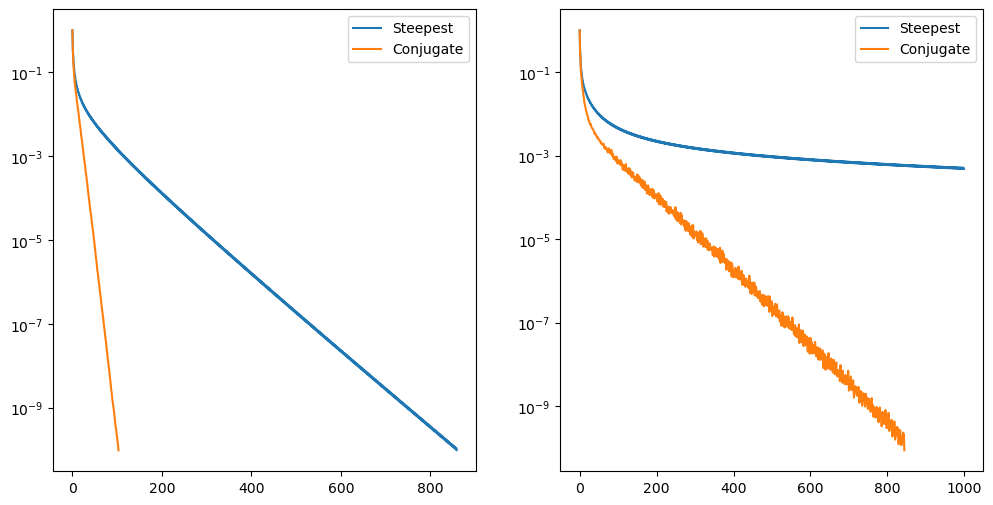

In [8]:
sol_ST, res_vec_ST, sol_vec_ST, numit_ST = sf.steepestdescent(A, b,  x0, itmax, toll)
sol_ST1, res_vec_ST1, sol_vec_ST1, numit_ST1 = sf.steepestdescent(A1, b1,  x0_1, itmax, toll)
sol_CJ, res_vec_CJ, sol_vec_CJ, numit_CJ = sf.conjugate_gradient(A, b, x0, itmax, toll)
sol_CJ1, res_vec_CJ1, sol_vec_CJ1, numit_CJ1 = sf.conjugate_gradient(A1, b1, x0_1, itmax, toll)


print("Soluzione A con steepest in ", numit_ST, ", condizionamento era =", npl.cond(A))
print("Soluzione A con conjugate in ", numit_CJ, ", condizionamento era =", npl.cond(A))

print("Soluzione A1 con steepest in ", numit_ST1, ", condizionamento era =", npl.cond(A1))
print("Soluzione A1 con conjugate in ", numit_CJ1, ", condizionamento era =", npl.cond(A1))

fig, ax = plt.subplots(1, 2, figsize= (12, 6))

ax[0].semilogy(range(numit_ST), res_vec_ST, label="Steepest")
ax[0].semilogy(range(numit_CJ), res_vec_CJ, label="Conjugate")
ax[0].legend()


ax[1].semilogy(range(numit_ST1), res_vec_ST1, label="Steepest")
ax[1].semilogy(range(numit_CJ1), res_vec_CJ1, label="Conjugate")
ax[1].legend()

# Esercizio 2

-  Si consideri la funzione $$f(x)=2\cdot x^4-(7/2) \cdot x^3+(3/4) \cdot x^2+x-1/4$$  

-  Si rappresenti il grafico della funzione in [-1,2] e si determini in quanti punti la funzione si annulla.  **[punti: 1]**

-  Si implementi  il metodo di Newton per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Si implementi il metodo di Bisezione per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno intervallo che lo contenga. Si applichi il metodo di Bisezione per determinare lo zero della funzione in tale sottointervallo.  Si dica se è possibile calcolare tutti gli zeri facendo uso del metodo di bisezione, richiamando il teorema su cui si basa il metodo di bisezione.  **[punti: 2]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno iterato iniziale in un intorno dello zero e si utilizzi  il metodo di Newton per determinare lo zero della funzione. Si calcoli l'ordine del metodo usando la funzione stima_ordine.
   **[punti: 2]**

-  Nel caso in cui si verifichi che il metodo di Newton abbia ordine 1, spiegare il perchè richiamando la teoria e modificare il metodo affinchè il suo ordine sia 2.  **[punti: 3]**

  **Totale punti 14**





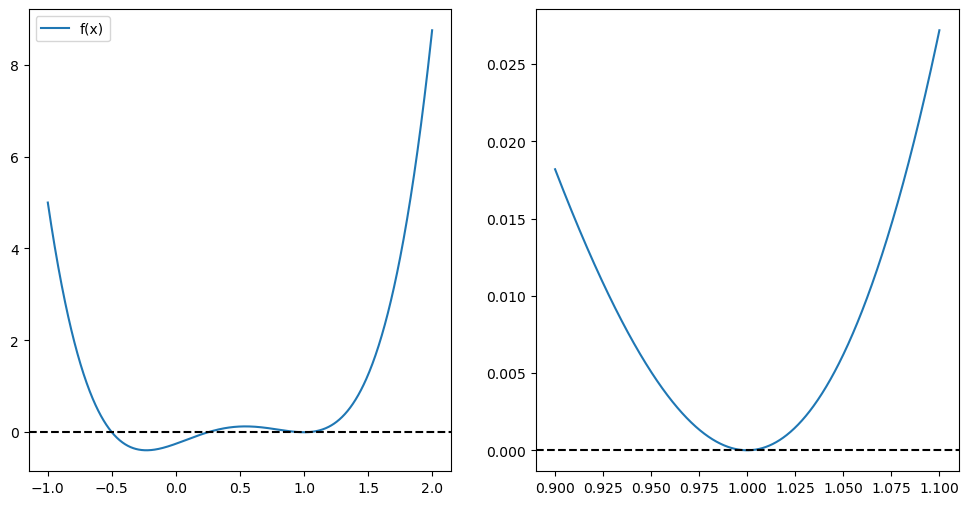

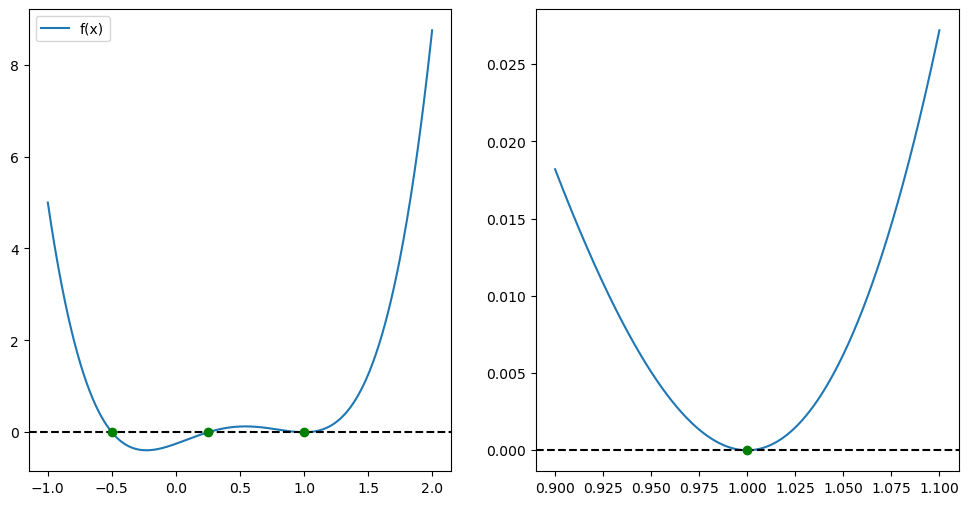

In [26]:
x = sym.symbols('s')

f_sym = 2*x**4 - (7/2)*x**3 + (3/4)*x**2 +x - 1/4
fd_sym = sym.diff(f_sym, x)

f = sym.lambdify(x, f_sym, np)
fd = sym.lambdify(x, fd_sym, np)

extr_left, extr_right = (-1, 2)

tolx, tolf = (1e-11, 1e-11)

a,b = (-0.7, 0.3)
a1,b1 = (0, 0.5)
a2,b2 = (0.9, 1.1)

x0_1 = -0.3
x0_2 = 0.45
x0_3 = 1.5

xx = np.linspace(extr_left, extr_right, 1000)
xx_zoom1 = np.linspace(a1, b1, 1000)
xx_zoom2 = np.linspace(a2, b2, 1000)

fig, ax = plt.subplots(1, 2, figsize= (12, 6))

ax[0].plot(xx, f(xx), label= "f(x)")
ax[0].axhline(0, color = "black", linestyle = "--")
ax[0].legend()


ax[1].plot(xx_zoom2, f(xx_zoom2))
ax[1].axhline(0, color = "black", linestyle = "--")



sol_BIS1, numit_BIS1, vec_sol_BIS1 = sf.metodo_bisezione(f, a, b, tolx, tolf)
sol_BIS2, numit_BIS2, vec_sol_BIS2 = sf.metodo_bisezione(f, a1, b1, tolx, tolf)
# Non è possibile calcolare il terzo zero con il metodo di bisezione, poichè non
# è possibile individuare due punti a, b | a<b and f(a)*f(b)<0 e che contengano 
# il terzo zero, poichè in tale punto si annulla anche la derivata prima, ma
#la funzione rimane positiva in tale intorno

sol_NT1, numit_NT1, vec_sol_NT1 = sf.newton(f, fd, x0_1, tolx, tolf, itmax)
sol_NT2, numit_NT2, vec_sol_NT2 = sf.newton(f, fd, x0_2, tolx, tolf, itmax)
sol_NT3, numit_NT3, vec_sol_NT3 = sf.newton(f, fd, x0_3, tolx, tolf, itmax)

sol_NT3_MOD, numit_NT3_MOD, vec_sol_NT3_MOD = sf.newton_mod(f, fd,2, x0_3, tolx, tolf, itmax)

fig, ax = plt.subplots(1, 2, figsize= (12, 6))

ax[0].plot(xx, f(xx), label= "f(x)")
ax[0].axhline(0, color = "black", linestyle = "--")
ax[0].plot(sol_NT1, f(sol_NT1), 'go')
ax[0].plot(sol_NT2, f(sol_NT2), 'go')
ax[0].plot(sol_NT3_MOD, f(sol_NT3_MOD), 'go')
ax[0].legend()


ax[1].plot(xx_zoom2, f(xx_zoom2))
ax[1].axhline(0, color = "black", linestyle = "--")
ax[1].plot(sol_NT3_MOD, f(sol_NT3_MOD), 'go')



In [27]:
print("Stima ordine metodo di newton sul terzo zero =",sf.stima_ordine(vec_sol_NT3,  numit_NT3))
print("Stima ordine metodo di newton mod sul terzo zero =",sf.stima_ordine(vec_sol_NT3_MOD,  numit_NT3_MOD))

Stima ordine metodo di newton sul terzo zero = 1.0000294559274554
Stima ordine metodo di newton mod sul terzo zero = 1.9847550023355343


## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta +0.5 punti, ogni risposta errata -0.5 punti. La mancanza di risposta 0 punti**

**1 Risolvere un problema mediante Machine Learning significa:**

 -  Fornire alla macchina i dati affinchè impari da sola a risolvere il problema $\impliedby$

 - Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina le esatte istruzioni per risolvere il problema

**2  A cosa serve il validation set?**

-  A trovare i migliori iperparametri del modello $\impliedby$

-  Ad addestrare il modello 
-  A testare il modello

-  A trovare le etichette dei dati di input

**3  Cosa è un Multi-Layer Perceptron?**

-  Una rete multi-livello composta da neuroni completamente connessi $\impliedby$

-  Una rete muti-livello composta da livelli convolutivi e neuroni completamente connessi

-  Una rete a singolo livello composta da neuroni completamente connessi

- Un neurone artificiale con un determinato input e determinati valori di uscita

**4 Il livello softmax**

- Trasforma i digits della rete in probabilità $\impliedby$

- Trasforma le probabilità della rete in digits

-  Normalizza i valori di input della rete

-  È indispensabile nel task di regressione

**5 In cosa consiste il task di regressione?**

· Nel predire un valore continuo in output $\impliedby$

· Nel predire una classe in output

· Nel predire un gruppo di appartenenza del dato di input

· Nel predire una categoria in output

## Domande Aperte

**6. Descrivere l'importanza dell'algoritmo di backpropagation** per il calcolo delle derivate parziali della funzione costo rispetto ai pesi di tutti i layer **[punti 1.5]**

**7** Ricavare la formula di aggiornamento dei pesi mediante algoritmo di backpropagation nel caso di una rete MLP formata da un nodo di input, 2 layer nascosti ciascuno dei quali costituito da un solo neurone ed un nodo di output.   **[punti: 3]**

6.
L'algoritmo di **backpropagation** è fondamentale per l'addestramento delle reti neurali, poiché permette di calcolare efficientemente le **derivate parziali della funzione costo** rispetto ai pesi di tutti i layer della rete. L'importanza di questo algoritmo può essere descritta nei seguenti punti:

1. **Ottimizzazione dei pesi tramite il gradiente discendente**:
   - La backpropagation utilizza la regola della catena per calcolare le derivate parziali della **funzione costo** rispetto ai pesi in ogni strato della rete neurale. Queste derivate sono essenziali per applicare l'algoritmo di **discesa del gradiente**, che aggiorna i pesi riducendo l'errore della rete. Questo processo consente alla rete di apprendere e migliorare le proprie prestazioni sui dati di addestramento.

2. **Efficienza computazionale**:
   - La backpropagation riduce il calcolo delle derivate parziali a un processo efficiente, sfruttando il fatto che gli strati della rete sono collegati tra loro. Calcolando le derivate dai layer di output verso i layer di input (da qui il nome "backpropagation"), l'algoritmo evita di ripetere calcoli inutili, rendendo possibile l'addestramento di reti neurali anche molto complesse con numerosi layer.

3. **Apprendimento profondo**:
   - Senza la backpropagation, il calcolo delle derivate sarebbe molto più lento e complesso, specialmente in reti neurali profonde. Grazie a questo algoritmo, è possibile addestrare **reti neurali profonde** (deep learning), che oggi sono alla base di molte applicazioni avanzate di intelligenza artificiale.
  
7.




Supponiamo che la rete MLP sia costituita da:
-  $x$ è l'input,
- 2 layer nascosti con un solo neurone ciascuno,
- 1 nodo di output.

I pesi e le attivazioni saranno indicati con:
-  $w^{(k)}$: peso del layer  $k$,
-  $z^{(k)}$: attivazione del neurone nel layer  $k$,
-  $C$: funzione di costo.

### Passo 1: Definizione delle attivazioni e dell'output
Le attivazioni dei due layer nascosti e dell'output sono:

-  $z^{(1)} = f(w^{(1)} x)$: attivazione del neurone nel primo layer nascosto,
-  $z^{(2)} = f(w^{(2)} z^{(1)})$: attivazione del neurone nel secondo layer nascosto,
-  $y_{\text{pred}} = f(w^{(3)} z^{(2)})$: output finale della rete, dove  $f$ è la funzione di attivazione.

La **funzione costo** è:
$$
C = \frac{1}{2} (y_{\text{pred}} - y_{\text{true}})^2
$$

### Passo 2: Calcolo del gradiente con backpropagation

#### a) Gradiente rispetto al peso  $w^{(3)}$ (ultimo strato)
Il gradiente della funzione costo rispetto a  $w^{(3)}$ è dato da:
$$
\frac{\partial C}{\partial w^{(3)}} = \frac{\partial C}{\partial y_{\text{pred}}} \cdot \frac{\partial y_{\text{pred}}}{\partial w^{(3)}}
$$

Poiché:
$$
\frac{\partial C}{\partial y_{\text{pred}}} = (y_{\text{pred}} - y_{\text{true}})
$$
e
$$
\frac{\partial y_{\text{pred}}}{\partial w^{(3)}} = z^{(2)} \cdot f'(w^{(3)} z^{(2)})
$$

Otteniamo:
$$
\frac{\partial C}{\partial w^{(3)}} = (y_{\text{pred}} - y_{\text{true}}) \cdot z^{(2)} \cdot f'(w^{(3)} z^{(2)})
$$

#### b) Gradiente rispetto a  $w^{(2)}$ (secondo strato nascosto)
Il gradiente della funzione costo rispetto a  $w^{(2)}$ è:
$$
\frac{\partial C}{\partial w^{(2)}} = \frac{\partial C}{\partial y_{\text{pred}}} \cdot \frac{\partial y_{\text{pred}}}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial w^{(2)}}
$$

Già sappiamo che:
$$
\frac{\partial C}{\partial y_{\text{pred}}} = (y_{\text{pred}} - y_{\text{true}})
$$
$$
\frac{\partial y_{\text{pred}}}{\partial z^{(2)}} = w^{(3)} \cdot f'(w^{(3)} z^{(2)})
$$
$$
\frac{\partial z^{(2)}}{\partial w^{(2)}} = z^{(1)} \cdot f'(w^{(2)} z^{(1)})
$$

Quindi:
$$
\frac{\partial C}{\partial w^{(2)}} = (y_{\text{pred}} - y_{\text{true}}) \cdot w^{(3)} \cdot f'(w^{(3)} z^{(2)}) \cdot z^{(1)} \cdot f'(w^{(2)} z^{(1)})
$$

#### c) Gradiente rispetto a  $w^{(1)}$ (primo strato nascosto)
Il gradiente della funzione costo rispetto a  $w^{(1)}$ è:
$$
\frac{\partial C}{\partial w^{(1)}} = \frac{\partial C}{\partial y_{\text{pred}}} \cdot \frac{\partial y_{\text{pred}}}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial z^{(1)}} \cdot \frac{\partial z^{(1)}}{\partial w^{(1)}}
$$

Sappiamo che:
$$
\frac{\partial C}{\partial y_{\text{pred}}} = (y_{\text{pred}} - y_{\text{true}})
$$
$$
\frac{\partial y_{\text{pred}}}{\partial z^{(2)}} = w^{(3)} \cdot f'(w^{(3)} z^{(2)})
$$
$$
\frac{\partial z^{(2)}}{\partial z^{(1)}} = w^{(2)} \cdot f'(w^{(2)} z^{(1)})
$$
$$
\frac{\partial z^{(1)}}{\partial w^{(1)}} = x \cdot f'(w^{(1)} x)
$$

Quindi:
$$
\frac{\partial C}{\partial w^{(1)}} = (y_{\text{pred}} - y_{\text{true}}) \cdot w^{(3)} \cdot f'(w^{(3)} z^{(2)}) \cdot w^{(2)} \cdot f'(w^{(2)} z^{(1)}) \cdot x \cdot f'(w^{(1)} x)
$$

### Passo 3: Formula di aggiornamento dei pesi
I pesi vengono aggiornati utilizzando la **discesa del gradiente** con la seguente formula:

$$
w^{(k)}_{\text{nuovo}} = w^{(k)}_{\text{vecchio}} - \eta \cdot \frac{\partial C}{\partial w^{(k)}}
$$

Dove  $\eta$ è il **learning rate**.

Le formule di aggiornamento specifiche per ogni peso sono quindi:

1.  $w^{(3)} = w^{(3)} - \eta \cdot \frac{\partial C}{\partial w^{(3)}}$
2.  $w^{(2)} = w^{(2)} - \eta \cdot \frac{\partial C}{\partial w^{(2)}}$
3.  $w^{(1)} = w^{(1)} - \eta \cdot \frac{\partial C}{\partial w^{(1)}}$

In questo modo, i pesi vengono aggiornati in base ai gradienti calcolati, e la rete neurale riduce progressivamente l'errore durante l'addestramento.
